In [109]:
!yes | sudo apt install python3.8-venv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.8-venv is already the newest version (3.8.10-0ubuntu1~20.04.6).
0 upgraded, 0 newly installed, 0 to remove and 63 not upgraded.
yes: standard output: Broken pipe


In [213]:
!pip install plyer
import time
from plyer import notification
notification.notify(
    title = "DETECTRON2",
    message = "YOU'R MODEL FINISHED TRAINING. LOOK AT THE OUTPUT NOW",
    timeout = 15
    )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.3/142.3 kB 1.8 MB/s eta 0:00:00a 0:00:01


DBusException: org.freedesktop.DBus.Error.NotSupported: Unable to autolaunch a dbus-daemon without a $DISPLAY for X11

In [111]:
!sudo apt-get install gcc g\+\+

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
gcc is already the newest version (4:9.3.0-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 63 not upgraded.


In [112]:
!pip uninstall detectron2

In [113]:
#johannes try
#!pip install torch==1.10.1 torchvision==0.11.2 torchaudio==0.10.1

In [114]:
# dinah try
!pip3 install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [115]:
# use to remove old detectron installations
!rm -r detectron2

In [116]:
!pip3 install ninja

In [117]:
!python3 -m pip install setuptools==58.2.0

In [118]:
#!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [119]:
#make sure detectron installation files knows where to find torch
!LD_LIBRARY_PATH=.../python3.9/site-packages/torch/lib/nvidia/cublas/lib/:$LD_LIBRARY_PATH

In [120]:
!python -m pip install pyyaml==5.3.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Cloning into 'detectron2'...
remote: Enumerating objects: 14935, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 14935 (delta 7), reused 13 (delta 3), pack-reused 14915
Receiving objects: 100% (14935/14935), 6.06 MiB | 3.78 MiB/s, done.
Resolving deltas: 100% (10823/10823), done.


In [121]:
import sys, os, distutils.core
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.9 ; cuda:  cu111
detectron2: 0.6


In [122]:
!pip3 install opencv-python

In [123]:
!yes | sudo apt-get install libgl1-mesa-glx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (21.2.6-0ubuntu0.1~20.04.2).
0 upgraded, 0 newly installed, 0 to remove and 63 not upgraded.
yes: standard output: Broken pipe


In [124]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os
import json
import cv2
import random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances


In [125]:
!LD_LIBRARY_PATH=.../python3.9/site-packages/cv2/:$LD_LIBRARY_PATH

In [126]:
os.getcwd()

'/workspace/scripts'

In [127]:
base_path = '/workspace/data_unsplit/'

#im = cv2.imread(base_path + "data_30/data.png")

In [128]:
## CRASHT DAS KERNEL !!
#cv2.imshow("testimage", im)

## Train on COCO dataset

In [129]:
#!pip install fiftyone

In [131]:
!rm -r /root/fiftyone/coco-2017/

In [132]:
## Changing the dataset to a toy dataset
import fiftyone

dataset = fiftyone.zoo.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["car"],
    max_samples=100,
)

dataset = fiftyone.zoo.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=["car"],
    max_samples=50,
)

 100% |██████|    1.9Gb/1.9Gb [15.3s elapsed, 0s remaining, 139.4Mb/s]      
Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'
 100% |██████████████████| 100/100 [1.6s elapsed, 0s remaining, 63.2 images/s]         
Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'
Dataset info written to '/root/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'train'
 100% |█████████████████| 100/100 [674.8ms elapsed, 0s remaining, 148.2 samples/s]      
Dataset 'coco-2017-train-100' created
Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'
 100% |████████████████████| 50/50 [834.9ms elapsed, 0s remaining, 59.9 images/s]      
Writing annotations for 50 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'
Dataset info written to '/root/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'validation'
 100% |███████████████████| 50/50 [330.4ms elapsed, 0s remaining, 153.1 sa

In [133]:
# we set a counter to register the same dataset again under a different name when we are debugging
global regis_num 
regis_num = 0

In [134]:
# Taken from https://eidos-ai.medium.com/training-on-detectron2-with-a-validation-set-and-plot-loss-on-it-to-avoid-overfitting-6449418fbf4e
# https://gist.github.com/ortegatron/c0dad15e49c2b74de8bb09a5615d9f6b

from EvalLossHook import LossEvalHook
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data import DatasetMapper


class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)
                     
    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1,LossEvalHook(
            self.cfg.TEST.EVAL_PERIOD,
            self.model,
            build_detection_test_loader(
                self.cfg,
                self.cfg.DATASETS.TEST[0],
                DatasetMapper(self.cfg,True)
            )
        ))
        return hooks

In [206]:
def train_detectron_standard(dataset_name_train, dataset_name_val, resolution, batch_size=1):

    '''
    func:   trains a standard detectron model with the given dataset name

    inputs:
    dataset_name_train: string name of the dataset that was registered with COCODataset
    resolution:         the resolution that the images have

    returns:
    cfg:        configurations object
    trainer:    trainer object from the model
    predictor:  predictor object from the model
    '''

    cfg = get_cfg()
    # try different model: changed to X101 FPN: faster_rcnn_X_101_32x8d_FPN_3x
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
    cfg.OUTPUT_DIR = f"/workspace/output/output_{resolution}_{str(batch_size)}"
    cfg.DATASETS.TRAIN = (dataset_name_train)
    cfg.DATASETS.TEST = (dataset_name_val,)
    cfg.TEST.EVAL_PERIOD = 2000
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = batch_size  # This is the real "batch size" commonly known to deep learning people
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR - davor
    cfg.SOLVER.MAX_ITER = 10000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
    cfg.SOLVER.STEPS = []        # do not decay learning rate
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 90  # has two plus one classes transmission and distribution tower + other towers. (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
    # NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

    #print(cfg.OUTPUT_DIR)


    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = MyTrainer(cfg) 
    trainer.resume_or_load(resume=False)
    trainer.train()


    # Inference should use the config with parameters that are used in training
    # cfg now already contains everything we've set previously. We changed it a little bit for inference:
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3   # set a custom testing threshold
    predictor = DefaultPredictor(cfg)


    return cfg, trainer, predictor

def evaluate_detectron(cfg, predictor_obj, resolution, dataset_name_val): 

    """
    func:   evaluates a trained detectron model

    input:
    cfg:                configuration object of the model
    predictor_obj:      the predictor object of the same model 
    resolution:         the resolution of the images
    dataset_name_val:   the COCO registered name of the val dataset

    returns:            dictionary with model metrics 
    """

    evaluator = COCOEvaluator(dataset_name_val, output_dir="/workspace/output/output"+str(resolution), max_dets_per_image = 30)
    val_loader = build_detection_test_loader(cfg, dataset_name_val)
    
    return inference_on_dataset(predictor_obj.model, val_loader, evaluator)
    # another equivalent way to evaluate the model is to use `trainer.test`

In [207]:
# notes for parameters
# max_dets_per_image Anzahl zu detektierender Objekte - wir haben Bilder mit bis zu 30 Türmen
# set learning rate von 0.00025 auf 0.0025
# set training iterations von 300 auf 1000

### Experiments to conduct / TODO

- train, val, test split
- loss curves plotten
- influence of batch size 
- ROI heads verkleinern
- learning rate
- image augmentation when training in loader

In [208]:
os.listdir('/root/fiftyone/coco-2017/validation')


jf = open('/root/fiftyone/coco-2017/train/labels.json')
labels_val = json.load(jf)

In [209]:
#labels_val

In [141]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [210]:
res = '030_coco'
eval_objs = []
#define the names 
dataset_name_train = "tower_train_" + str(res) + "1"
dataset_name_val = "tower_val_" + str(res) + "1"

try: 
    # if it throws an error that name is already registered, just change the name... 
    register_coco_instances(dataset_name_train, {},'/root/fiftyone/coco-2017/train/labels.json', '/root/fiftyone/coco-2017/train/data')
    register_coco_instances(dataset_name_val, {},'/root/fiftyone/coco-2017/validation/labels.json', '/root/fiftyone/coco-2017/validation/data')
    
except: 
    regis_num += 1
    dataset_name_train += str(regis_num)
    dataset_name_val += str(regis_num)

    # if it throws an error that name is already registered, just change the name... 
    register_coco_instances(dataset_name_train, {},'/root/fiftyone/coco-2017/train/labels.json', '/root/fiftyone/coco-2017/train/data')
    register_coco_instances(dataset_name_val, {},'/root/fiftyone/coco-2017/validation/labels.json', '/root/fiftyone/coco-2017/validation/data')
    
configuration, train_obj, predictor_obj = train_detectron_standard(dataset_name_train, dataset_name_val, res)

eval_objs.append(evaluate_detectron(configuration, predictor_obj, res, dataset_name_val))

#with open('../eval.txt', 'w') as f:
#    f.write(str(eval_objs))

[03/19 16:57:19 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[03/19 16:57:19 d2.data.datasets.coco]: Loaded 100 images in COCO format from /root/fiftyone/coco-2017/train/labels.json
[03/19 16:57:19 d2.data.build]: Removed 0 images with no usable annotations. 100 images left.
[03/19 16:57:19 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[03/19 16:57:19 d2.data.build]: Using training sampler TrainingSampler
[03/19 16:57:19 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[03/19 16:57:19 d2.data.common]: Serializing 100 elements to byte tensors and concatenating them all ...
[03/19 16:57:19 d2.data.common]: Serialized dataset takes 0.50 MiB
[03/19 16:57:19 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (91, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (91,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (360, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (360,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bi

[03/19 16:57:19 d2.engine.train_loop]: Starting training from iteration 0
[03/19 16:57:22 d2.utils.events]:  eta: 0:19:57  iter: 19  total_loss: 5.326  loss_cls: 4.434  loss_box_reg: 0.6766  loss_rpn_cls: 0.02926  loss_rpn_loc: 0.06021    time: 0.1197  last_time: 0.1091  data_time: 0.0117  last_data_time: 0.0022   lr: 4.9953e-06  max_mem: 2344M
[03/19 16:57:24 d2.utils.events]:  eta: 0:19:12  iter: 39  total_loss: 5.28  loss_cls: 4.362  loss_box_reg: 0.7709  loss_rpn_cls: 0.02623  loss_rpn_loc: 0.08186    time: 0.1166  last_time: 0.1148  data_time: 0.0023  last_data_time: 0.0022   lr: 9.9902e-06  max_mem: 2344M
[03/19 16:57:27 d2.utils.events]:  eta: 0:19:20  iter: 59  total_loss: 4.773  loss_cls: 4.135  loss_box_reg: 0.6417  loss_rpn_cls: 0.01838  loss_rpn_loc: 0.02996    time: 0.1169  last_time: 0.1197  data_time: 0.0025  last_data_time: 0.0020   lr: 1.4985e-05  max_mem: 2344M
[03/19 16:57:29 d2.utils.events]:  eta: 0:19:00  iter: 79  total_loss: 4.416  loss_cls: 3.717  loss_box_reg:

[03/19 16:58:28 d2.utils.events]:  eta: 0:17:01  iter: 619  total_loss: 1.341  loss_cls: 0.4854  loss_box_reg: 0.5776  loss_rpn_cls: 0.02319  loss_rpn_loc: 0.05824    time: 0.1094  last_time: 0.1094  data_time: 0.0022  last_data_time: 0.0022   lr: 0.00015485  max_mem: 2344M
[03/19 16:58:30 d2.utils.events]:  eta: 0:16:57  iter: 639  total_loss: 1.356  loss_cls: 0.5302  loss_box_reg: 0.7211  loss_rpn_cls: 0.01802  loss_rpn_loc: 0.03969    time: 0.1092  last_time: 0.1050  data_time: 0.0022  last_data_time: 0.0020   lr: 0.00015984  max_mem: 2344M
[03/19 16:58:32 d2.utils.events]:  eta: 0:16:51  iter: 659  total_loss: 0.8946  loss_cls: 0.4103  loss_box_reg: 0.4314  loss_rpn_cls: 0.01115  loss_rpn_loc: 0.01763    time: 0.1090  last_time: 0.1000  data_time: 0.0021  last_data_time: 0.0022   lr: 0.00016484  max_mem: 2344M
[03/19 16:58:34 d2.utils.events]:  eta: 0:16:47  iter: 679  total_loss: 1.401  loss_cls: 0.525  loss_box_reg: 0.6182  loss_rpn_cls: 0.03315  loss_rpn_loc: 0.07262    time: 0.

[03/19 16:59:29 d2.utils.events]:  eta: 0:15:09  iter: 1219  total_loss: 0.7116  loss_cls: 0.2898  loss_box_reg: 0.3555  loss_rpn_cls: 0.01504  loss_rpn_loc: 0.07064    time: 0.1060  last_time: 0.1014  data_time: 0.0023  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 16:59:32 d2.utils.events]:  eta: 0:15:08  iter: 1239  total_loss: 0.8754  loss_cls: 0.3317  loss_box_reg: 0.4358  loss_rpn_cls: 0.008823  loss_rpn_loc: 0.05787    time: 0.1061  last_time: 0.1078  data_time: 0.0023  last_data_time: 0.0023   lr: 0.00025  max_mem: 2344M
[03/19 16:59:34 d2.utils.events]:  eta: 0:15:06  iter: 1259  total_loss: 0.5897  loss_cls: 0.2271  loss_box_reg: 0.3152  loss_rpn_cls: 0.004522  loss_rpn_loc: 0.03176    time: 0.1061  last_time: 0.1042  data_time: 0.0021  last_data_time: 0.0025   lr: 0.00025  max_mem: 2344M
[03/19 16:59:36 d2.utils.events]:  eta: 0:15:04  iter: 1279  total_loss: 0.9399  loss_cls: 0.3314  loss_box_reg: 0.5159  loss_rpn_cls: 0.01382  loss_rpn_loc: 0.03929    time: 0

[03/19 17:00:36 d2.utils.events]:  eta: 0:14:34  iter: 1819  total_loss: 0.6694  loss_cls: 0.1996  loss_box_reg: 0.3852  loss_rpn_cls: 0.006179  loss_rpn_loc: 0.04133    time: 0.1076  last_time: 0.1087  data_time: 0.0025  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 17:00:38 d2.utils.events]:  eta: 0:14:33  iter: 1839  total_loss: 0.7684  loss_cls: 0.2123  loss_box_reg: 0.4142  loss_rpn_cls: 0.01182  loss_rpn_loc: 0.08945    time: 0.1076  last_time: 0.1116  data_time: 0.0023  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 17:00:40 d2.utils.events]:  eta: 0:14:31  iter: 1859  total_loss: 0.7139  loss_cls: 0.2349  loss_box_reg: 0.4309  loss_rpn_cls: 0.007484  loss_rpn_loc: 0.05275    time: 0.1076  last_time: 0.1037  data_time: 0.0023  last_data_time: 0.0028   lr: 0.00025  max_mem: 2344M
[03/19 17:00:43 d2.utils.events]:  eta: 0:14:29  iter: 1879  total_loss: 0.7305  loss_cls: 0.2043  loss_box_reg: 0.4456  loss_rpn_cls: 0.01167  loss_rpn_loc: 0.0353    time: 0.

[03/19 17:01:02 d2.utils.events]:  eta: 0:14:21  iter: 1999  total_loss: 0.6286  loss_cls: 0.1804  loss_box_reg: 0.3695  loss_rpn_cls: 0.006482  loss_rpn_loc: 0.05914  validation_loss: 0.985    time: 0.1077  last_time: 0.1112  data_time: 0.0023  last_data_time: 0.0025   lr: 0.00025  max_mem: 2344M
[03/19 17:01:05 d2.utils.events]:  eta: 0:14:21  iter: 2019  total_loss: 0.9539  loss_cls: 0.3093  loss_box_reg: 0.4821  loss_rpn_cls: 0.009251  loss_rpn_loc: 0.1278  validation_loss: 0.985    time: 0.1078  last_time: 0.1103  data_time: 0.0028  last_data_time: 0.0027   lr: 0.00025  max_mem: 2344M
[03/19 17:01:07 d2.utils.events]:  eta: 0:14:23  iter: 2039  total_loss: 0.5876  loss_cls: 0.1402  loss_box_reg: 0.3232  loss_rpn_cls: 0.00425  loss_rpn_loc: 0.04659  validation_loss: 0.985    time: 0.1079  last_time: 0.1184  data_time: 0.0026  last_data_time: 0.0028   lr: 0.00025  max_mem: 2344M
[03/19 17:01:09 d2.utils.events]:  eta: 0:14:23  iter: 2059  total_loss: 0.4507  loss_cls: 0.1535  loss_b

[03/19 17:02:08 d2.utils.events]:  eta: 0:14:10  iter: 2559  total_loss: 0.5331  loss_cls: 0.1532  loss_box_reg: 0.3469  loss_rpn_cls: 0.001989  loss_rpn_loc: 0.04557  validation_loss: 0.985    time: 0.1096  last_time: 0.1146  data_time: 0.0026  last_data_time: 0.0025   lr: 0.00025  max_mem: 2344M
[03/19 17:02:10 d2.utils.events]:  eta: 0:14:08  iter: 2579  total_loss: 0.6212  loss_cls: 0.1519  loss_box_reg: 0.3748  loss_rpn_cls: 0.006231  loss_rpn_loc: 0.06639  validation_loss: 0.985    time: 0.1097  last_time: 0.1185  data_time: 0.0026  last_data_time: 0.0023   lr: 0.00025  max_mem: 2344M
[03/19 17:02:13 d2.utils.events]:  eta: 0:14:06  iter: 2599  total_loss: 0.5831  loss_cls: 0.1612  loss_box_reg: 0.3278  loss_rpn_cls: 0.004257  loss_rpn_loc: 0.03741  validation_loss: 0.985    time: 0.1098  last_time: 0.1110  data_time: 0.0025  last_data_time: 0.0020   lr: 0.00025  max_mem: 2344M
[03/19 17:02:15 d2.utils.events]:  eta: 0:14:04  iter: 2619  total_loss: 0.666  loss_cls: 0.1781  loss_

[03/19 17:03:12 d2.utils.events]:  eta: 0:13:12  iter: 3119  total_loss: 0.4543  loss_cls: 0.1305  loss_box_reg: 0.2824  loss_rpn_cls: 0.001986  loss_rpn_loc: 0.03012  validation_loss: 0.985    time: 0.1105  last_time: 0.1160  data_time: 0.0027  last_data_time: 0.0023   lr: 0.00025  max_mem: 2344M
[03/19 17:03:15 d2.utils.events]:  eta: 0:13:10  iter: 3139  total_loss: 0.4022  loss_cls: 0.117  loss_box_reg: 0.2548  loss_rpn_cls: 0.002634  loss_rpn_loc: 0.02698  validation_loss: 0.985    time: 0.1105  last_time: 0.1165  data_time: 0.0025  last_data_time: 0.0027   lr: 0.00025  max_mem: 2344M
[03/19 17:03:17 d2.utils.events]:  eta: 0:13:08  iter: 3159  total_loss: 0.5991  loss_cls: 0.1426  loss_box_reg: 0.3717  loss_rpn_cls: 0.003453  loss_rpn_loc: 0.04321  validation_loss: 0.985    time: 0.1106  last_time: 0.1131  data_time: 0.0025  last_data_time: 0.0025   lr: 0.00025  max_mem: 2344M
[03/19 17:03:19 d2.utils.events]:  eta: 0:13:06  iter: 3179  total_loss: 0.4855  loss_cls: 0.1359  loss_

[03/19 17:04:14 d2.utils.events]:  eta: 0:11:41  iter: 3679  total_loss: 0.4857  loss_cls: 0.1281  loss_box_reg: 0.2879  loss_rpn_cls: 0.001406  loss_rpn_loc: 0.04154  validation_loss: 0.985    time: 0.1103  last_time: 0.1097  data_time: 0.0024  last_data_time: 0.0022   lr: 0.00025  max_mem: 2344M
[03/19 17:04:16 d2.utils.events]:  eta: 0:11:38  iter: 3699  total_loss: 0.467  loss_cls: 0.1165  loss_box_reg: 0.2954  loss_rpn_cls: 0.005457  loss_rpn_loc: 0.02708  validation_loss: 0.985    time: 0.1103  last_time: 0.0995  data_time: 0.0023  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 17:04:18 d2.utils.events]:  eta: 0:11:34  iter: 3719  total_loss: 0.345  loss_cls: 0.08747  loss_box_reg: 0.23  loss_rpn_cls: 0.0004964  loss_rpn_loc: 0.01947  validation_loss: 0.985    time: 0.1102  last_time: 0.1059  data_time: 0.0025  last_data_time: 0.0022   lr: 0.00025  max_mem: 2344M
[03/19 17:04:20 d2.utils.events]:  eta: 0:11:31  iter: 3739  total_loss: 0.5402  loss_cls: 0.1504  loss_b

[03/19 17:04:51 d2.engine.defaults]: Evaluation results for tower_val_030_coco17 in csv format:
[03/19 17:04:51 d2.evaluation.testing]: copypaste: Task: bbox
[03/19 17:04:51 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[03/19 17:04:51 d2.evaluation.testing]: copypaste: 32.1824,50.9112,33.4075,24.6983,36.2782,60.1890
[03/19 17:04:55 d2.utils.events]:  eta: 0:10:51  iter: 3999  total_loss: 0.4886  loss_cls: 0.1307  loss_box_reg: 0.2938  loss_rpn_cls: 0.004052  loss_rpn_loc: 0.05155  validation_loss: 1.105    time: 0.1101  last_time: 0.1194  data_time: 0.0023  last_data_time: 0.0024   lr: 0.00025  max_mem: 2344M
[03/19 17:04:57 d2.utils.events]:  eta: 0:10:50  iter: 4019  total_loss: 0.4905  loss_cls: 0.1277  loss_box_reg: 0.3071  loss_rpn_cls: 0.002645  loss_rpn_loc: 0.05685  validation_loss: 1.105    time: 0.1101  last_time: 0.1111  data_time: 0.0024  last_data_time: 0.0025   lr: 0.00025  max_mem: 2344M
[03/19 17:05:00 d2.utils.events]:  eta: 0:10:48  iter: 4039  total_lo

[03/19 17:05:56 d2.utils.events]:  eta: 0:09:59  iter: 4539  total_loss: 0.3984  loss_cls: 0.1104  loss_box_reg: 0.2349  loss_rpn_cls: 0.003823  loss_rpn_loc: 0.0413  validation_loss: 1.105    time: 0.1105  last_time: 0.1118  data_time: 0.0025  last_data_time: 0.0028   lr: 0.00025  max_mem: 2344M
[03/19 17:05:59 d2.utils.events]:  eta: 0:09:58  iter: 4559  total_loss: 0.4889  loss_cls: 0.1348  loss_box_reg: 0.2598  loss_rpn_cls: 0.002699  loss_rpn_loc: 0.04809  validation_loss: 1.105    time: 0.1105  last_time: 0.1078  data_time: 0.0025  last_data_time: 0.0033   lr: 0.00025  max_mem: 2344M
[03/19 17:06:01 d2.utils.events]:  eta: 0:09:56  iter: 4579  total_loss: 0.4777  loss_cls: 0.1419  loss_box_reg: 0.2788  loss_rpn_cls: 0.002017  loss_rpn_loc: 0.03788  validation_loss: 1.105    time: 0.1105  last_time: 0.1115  data_time: 0.0025  last_data_time: 0.0027   lr: 0.00025  max_mem: 2344M
[03/19 17:06:03 d2.utils.events]:  eta: 0:09:55  iter: 4599  total_loss: 0.4157  loss_cls: 0.1017  loss_

[03/19 17:06:59 d2.utils.events]:  eta: 0:09:07  iter: 5099  total_loss: 0.2164  loss_cls: 0.06652  loss_box_reg: 0.1519  loss_rpn_cls: 0.0006105  loss_rpn_loc: 0.01687  validation_loss: 1.105    time: 0.1105  last_time: 0.1025  data_time: 0.0022  last_data_time: 0.0023   lr: 0.00025  max_mem: 2344M
[03/19 17:07:01 d2.utils.events]:  eta: 0:09:04  iter: 5119  total_loss: 0.4634  loss_cls: 0.1074  loss_box_reg: 0.2839  loss_rpn_cls: 0.002608  loss_rpn_loc: 0.04954  validation_loss: 1.105    time: 0.1105  last_time: 0.1149  data_time: 0.0022  last_data_time: 0.0028   lr: 0.00025  max_mem: 2344M
[03/19 17:07:03 d2.utils.events]:  eta: 0:09:01  iter: 5139  total_loss: 0.4399  loss_cls: 0.1225  loss_box_reg: 0.2658  loss_rpn_cls: 0.001797  loss_rpn_loc: 0.05119  validation_loss: 1.105    time: 0.1104  last_time: 0.1040  data_time: 0.0021  last_data_time: 0.0023   lr: 0.00025  max_mem: 2344M
[03/19 17:07:05 d2.utils.events]:  eta: 0:08:58  iter: 5159  total_loss: 0.3459  loss_cls: 0.09973  l

[03/19 17:07:58 d2.utils.events]:  eta: 0:07:42  iter: 5659  total_loss: 0.423  loss_cls: 0.08087  loss_box_reg: 0.2363  loss_rpn_cls: 0.001957  loss_rpn_loc: 0.03989  validation_loss: 1.105    time: 0.1099  last_time: 0.1092  data_time: 0.0022  last_data_time: 0.0027   lr: 0.00025  max_mem: 2344M
[03/19 17:08:00 d2.utils.events]:  eta: 0:07:39  iter: 5679  total_loss: 0.4935  loss_cls: 0.1256  loss_box_reg: 0.2657  loss_rpn_cls: 0.002063  loss_rpn_loc: 0.05411  validation_loss: 1.105    time: 0.1099  last_time: 0.0960  data_time: 0.0022  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 17:08:02 d2.utils.events]:  eta: 0:07:36  iter: 5699  total_loss: 0.3462  loss_cls: 0.09291  loss_box_reg: 0.1988  loss_rpn_cls: 0.00157  loss_rpn_loc: 0.03877  validation_loss: 1.105    time: 0.1098  last_time: 0.1019  data_time: 0.0021  last_data_time: 0.0024   lr: 0.00025  max_mem: 2344M
[03/19 17:08:04 d2.utils.events]:  eta: 0:07:33  iter: 5719  total_loss: 0.3265  loss_cls: 0.08437  los

[03/19 17:08:35 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category      | AP     | category     | AP     | category       | AP     |
|:--------------|:-------|:-------------|:-------|:---------------|:-------|
| person        | 42.286 | bicycle      | 12.916 | car            | 34.548 |
| motorcycle    | 34.311 | airplane     | 45.446 | bus            | 55.475 |
| train         | 61.947 | truck        | 15.653 | boat           | 0.000  |
| traffic light | 27.478 | fire hydrant | 50.198 | stop sign      | 45.446 |
| parking meter | 72.525 | bench        | 30.000 | bird           | 35.000 |
| cat           | 70.099 | dog          | 60.000 | horse          | 42.706 |
| sheep         | nan    | cow          | nan    | elephant       | nan    |
| bear          | nan    | zebra        | nan    | giraffe        | nan    |
| backpack      | 21.584 | umbrella     | 36.832 | handbag        | 1.160  |
| tie           | 40.099 | suitcase     | 41.188 | frisbee        | 0.000  |
| ski

[03/19 17:09:19 d2.utils.events]:  eta: 0:06:12  iter: 6379  total_loss: 0.2929  loss_cls: 0.08786  loss_box_reg: 0.1853  loss_rpn_cls: 0.0007901  loss_rpn_loc: 0.03086  validation_loss: 1.202    time: 0.1093  last_time: 0.1172  data_time: 0.0025  last_data_time: 0.0020   lr: 0.00025  max_mem: 2344M
[03/19 17:09:22 d2.utils.events]:  eta: 0:06:11  iter: 6399  total_loss: 0.3274  loss_cls: 0.09516  loss_box_reg: 0.2018  loss_rpn_cls: 0.001055  loss_rpn_loc: 0.03539  validation_loss: 1.202    time: 0.1093  last_time: 0.1071  data_time: 0.0023  last_data_time: 0.0022   lr: 0.00025  max_mem: 2344M
[03/19 17:09:24 d2.utils.events]:  eta: 0:06:10  iter: 6419  total_loss: 0.302  loss_cls: 0.08357  loss_box_reg: 0.1809  loss_rpn_cls: 0.001177  loss_rpn_loc: 0.02924  validation_loss: 1.202    time: 0.1093  last_time: 0.1089  data_time: 0.0023  last_data_time: 0.0022   lr: 0.00025  max_mem: 2344M
[03/19 17:09:26 d2.utils.events]:  eta: 0:06:08  iter: 6439  total_loss: 0.2477  loss_cls: 0.07618  

[03/19 17:10:23 d2.utils.events]:  eta: 0:05:36  iter: 6939  total_loss: 0.2695  loss_cls: 0.06962  loss_box_reg: 0.1829  loss_rpn_cls: 0.0003867  loss_rpn_loc: 0.02207  validation_loss: 1.202    time: 0.1096  last_time: 0.1173  data_time: 0.0026  last_data_time: 0.0027   lr: 0.00025  max_mem: 2344M
[03/19 17:10:26 d2.utils.events]:  eta: 0:05:35  iter: 6959  total_loss: 0.4308  loss_cls: 0.09273  loss_box_reg: 0.2386  loss_rpn_cls: 0.002573  loss_rpn_loc: 0.07444  validation_loss: 1.202    time: 0.1096  last_time: 0.1057  data_time: 0.0025  last_data_time: 0.0029   lr: 0.00025  max_mem: 2344M
[03/19 17:10:28 d2.utils.events]:  eta: 0:05:34  iter: 6979  total_loss: 0.2828  loss_cls: 0.08119  loss_box_reg: 0.1839  loss_rpn_cls: 0.0004314  loss_rpn_loc: 0.02354  validation_loss: 1.202    time: 0.1096  last_time: 0.1121  data_time: 0.0026  last_data_time: 0.0028   lr: 0.00025  max_mem: 2344M
[03/19 17:10:30 d2.utils.events]:  eta: 0:05:32  iter: 6999  total_loss: 0.4257  loss_cls: 0.09877

[03/19 17:11:25 d2.utils.events]:  eta: 0:04:39  iter: 7499  total_loss: 0.2866  loss_cls: 0.07566  loss_box_reg: 0.1863  loss_rpn_cls: 0.0009729  loss_rpn_loc: 0.03274  validation_loss: 1.202    time: 0.1096  last_time: 0.1172  data_time: 0.0025  last_data_time: 0.0024   lr: 0.00025  max_mem: 2344M
[03/19 17:11:27 d2.utils.events]:  eta: 0:04:37  iter: 7519  total_loss: 0.3432  loss_cls: 0.08411  loss_box_reg: 0.1936  loss_rpn_cls: 0.0008608  loss_rpn_loc: 0.0294  validation_loss: 1.202    time: 0.1096  last_time: 0.1114  data_time: 0.0024  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 17:11:30 d2.utils.events]:  eta: 0:04:35  iter: 7539  total_loss: 0.2905  loss_cls: 0.09751  loss_box_reg: 0.1797  loss_rpn_cls: 0.0008073  loss_rpn_loc: 0.03015  validation_loss: 1.202    time: 0.1097  last_time: 0.1127  data_time: 0.0026  last_data_time: 0.0024   lr: 0.00025  max_mem: 2344M
[03/19 17:11:32 d2.utils.events]:  eta: 0:04:33  iter: 7559  total_loss: 0.213  loss_cls: 0.05491 

WARNING [03/19 17:12:18 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[03/19 17:12:18 d2.evaluation.evaluator]: Start inference on 50 batches
[03/19 17:12:18 d2.evaluation.evaluator]: Inference done 11/50. Dataloading: 0.0009 s/iter. Inference: 0.0446 s/iter. Eval: 0.0002 s/iter. Total: 0.0457 s/iter. ETA=0:00:01
[03/19 17:12:20 d2.evaluation.evaluator]: Total inference time: 0:00:02.124939 (0.047221 s / iter per device, on 1 devices)
[03/19 17:12:20 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.043676 s / iter per device, on 1 devices)
[03/19 17:12:20 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/19 17:12:20 d2.evaluation.coco_evaluation]: Saving results to /workspace/output/output_030_coco_1/inference/coco_instances_results.json
[03/19 17:12:20 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading 

[03/19 17:12:47 d2.utils.events]:  eta: 0:03:08  iter: 8219  total_loss: 0.3345  loss_cls: 0.08023  loss_box_reg: 0.1883  loss_rpn_cls: 0.001097  loss_rpn_loc: 0.03875  validation_loss: 1.27    time: 0.1092  last_time: 0.1057  data_time: 0.0024  last_data_time: 0.0028   lr: 0.00025  max_mem: 2344M
[03/19 17:12:49 d2.utils.events]:  eta: 0:03:07  iter: 8239  total_loss: 0.2755  loss_cls: 0.07222  loss_box_reg: 0.1805  loss_rpn_cls: 0.0002948  loss_rpn_loc: 0.01949  validation_loss: 1.27    time: 0.1092  last_time: 0.1172  data_time: 0.0024  last_data_time: 0.0023   lr: 0.00025  max_mem: 2344M
[03/19 17:12:51 d2.utils.events]:  eta: 0:03:05  iter: 8259  total_loss: 0.3786  loss_cls: 0.08862  loss_box_reg: 0.2182  loss_rpn_cls: 0.001437  loss_rpn_loc: 0.03655  validation_loss: 1.27    time: 0.1092  last_time: 0.1034  data_time: 0.0023  last_data_time: 0.0023   lr: 0.00025  max_mem: 2344M
[03/19 17:12:53 d2.utils.events]:  eta: 0:03:02  iter: 8279  total_loss: 0.2578  loss_cls: 0.06629  lo

[03/19 17:13:46 d2.utils.events]:  eta: 0:02:05  iter: 8779  total_loss: 0.3451  loss_cls: 0.07413  loss_box_reg: 0.2195  loss_rpn_cls: 0.0007496  loss_rpn_loc: 0.02497  validation_loss: 1.27    time: 0.1089  last_time: 0.1006  data_time: 0.0025  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 17:13:48 d2.utils.events]:  eta: 0:02:03  iter: 8799  total_loss: 0.2837  loss_cls: 0.07204  loss_box_reg: 0.1901  loss_rpn_cls: 0.0008898  loss_rpn_loc: 0.02184  validation_loss: 1.27    time: 0.1089  last_time: 0.1068  data_time: 0.0022  last_data_time: 0.0022   lr: 0.00025  max_mem: 2344M
[03/19 17:13:50 d2.utils.events]:  eta: 0:02:01  iter: 8819  total_loss: 0.1375  loss_cls: 0.03056  loss_box_reg: 0.0996  loss_rpn_cls: 0.0002785  loss_rpn_loc: 0.01186  validation_loss: 1.27    time: 0.1089  last_time: 0.1018  data_time: 0.0023  last_data_time: 0.0024   lr: 0.00025  max_mem: 2344M
[03/19 17:13:52 d2.utils.events]:  eta: 0:01:59  iter: 8839  total_loss: 0.3528  loss_cls: 0.09296  

[03/19 17:14:44 d2.utils.events]:  eta: 0:01:08  iter: 9339  total_loss: 0.2092  loss_cls: 0.06142  loss_box_reg: 0.1358  loss_rpn_cls: 0.0009022  loss_rpn_loc: 0.02142  validation_loss: 1.27    time: 0.1086  last_time: 0.1026  data_time: 0.0022  last_data_time: 0.0018   lr: 0.00025  max_mem: 2344M
[03/19 17:14:46 d2.utils.events]:  eta: 0:01:06  iter: 9359  total_loss: 0.2841  loss_cls: 0.07203  loss_box_reg: 0.1581  loss_rpn_cls: 0.0003386  loss_rpn_loc: 0.03433  validation_loss: 1.27    time: 0.1086  last_time: 0.0999  data_time: 0.0022  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 17:14:49 d2.utils.events]:  eta: 0:01:04  iter: 9379  total_loss: 0.2692  loss_cls: 0.07585  loss_box_reg: 0.1607  loss_rpn_cls: 0.001203  loss_rpn_loc: 0.0252  validation_loss: 1.27    time: 0.1086  last_time: 0.1118  data_time: 0.0022  last_data_time: 0.0026   lr: 0.00025  max_mem: 2344M
[03/19 17:14:51 d2.utils.events]:  eta: 0:01:02  iter: 9399  total_loss: 0.2788  loss_cls: 0.06203  lo

[03/19 17:15:43 d2.utils.events]:  eta: 0:00:10  iter: 9899  total_loss: 0.2491  loss_cls: 0.05991  loss_box_reg: 0.1528  loss_rpn_cls: 0.0003218  loss_rpn_loc: 0.01873  validation_loss: 1.27    time: 0.1084  last_time: 0.1122  data_time: 0.0021  last_data_time: 0.0020   lr: 0.00025  max_mem: 2344M
[03/19 17:15:45 d2.utils.events]:  eta: 0:00:08  iter: 9919  total_loss: 0.2249  loss_cls: 0.06506  loss_box_reg: 0.1426  loss_rpn_cls: 0.0005283  loss_rpn_loc: 0.01285  validation_loss: 1.27    time: 0.1084  last_time: 0.0967  data_time: 0.0021  last_data_time: 0.0026   lr: 0.00025  max_mem: 2344M
[03/19 17:15:47 d2.utils.events]:  eta: 0:00:06  iter: 9939  total_loss: 0.3188  loss_cls: 0.08722  loss_box_reg: 0.1882  loss_rpn_cls: 0.001269  loss_rpn_loc: 0.03446  validation_loss: 1.27    time: 0.1084  last_time: 0.1002  data_time: 0.0021  last_data_time: 0.0021   lr: 0.00025  max_mem: 2344M
[03/19 17:15:49 d2.utils.events]:  eta: 0:00:04  iter: 9959  total_loss: 0.2379  loss_cls: 0.07363  l

[03/19 17:16:03 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[03/19 17:16:03 d2.data.common]: Serializing 50 elements to byte tensors and concatenating them all ...
[03/19 17:16:03 d2.data.common]: Serialized dataset takes 0.24 MiB
[03/19 17:16:03 d2.evaluation.evaluator]: Start inference on 50 batches
[03/19 17:16:05 d2.evaluation.evaluator]: Inference done 30/50. Dataloading: 0.0015 s/iter. Inference: 0.0504 s/iter. Eval: 0.0002 s/iter. Total: 0.0522 s/iter. ETA=0:00:01
[03/19 17:16:06 d2.evaluation.evaluator]: Total inference time: 0:00:02.481724 (0.055149 s / iter per device, on 1 devices)
[03/19 17:16:06 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.050326 s / iter per device, on 1 devices)
[03/19 17:16:06 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/19 17:16:06 d2.evaluation.coco_evaluation]: Saving results to /workspace/output/output030_coco/coco_instances_results.json

In [161]:
# warning message at the beginning of training "Skip loading parameter ...." can be ignored, 
#it is due to the fact that pretrained model had a different number of categories than our dataset
#https://github.com/facebookresearch/detectron2/issues/196

In [162]:
import numpy as np
import os
import json
import cv2
import random
import pandas as pd

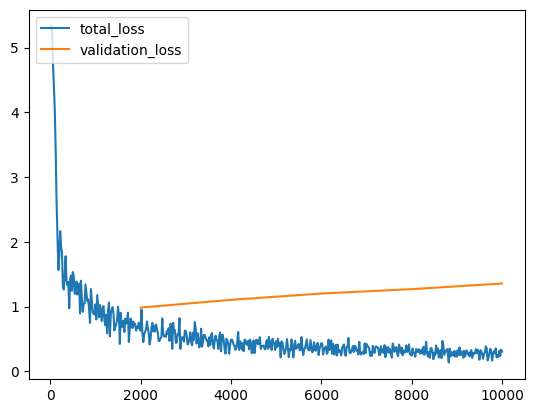

In [211]:
import json
import matplotlib.pyplot as plt

experiment_folder = '/workspace/output/output_030_coco_1'

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
    [x['iteration'] for x in experiment_metrics if 'total_loss' in x], 
    [x['total_loss'] for x in experiment_metrics if 'total_loss' in x])
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
    [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x])
plt.legend(['total_loss', 'validation_loss'], loc='upper left')
plt.show()

/workspace/output/output_030_coco_1/metrics.json


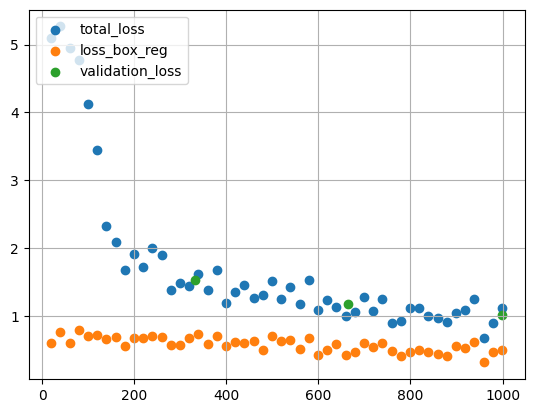

In [203]:
# Taken from https://eidos-ai.medium.com/training-on-detectron2-with-a-validation-set-and-plot-loss-on-it-to-avoid-overfitting-6449418fbf4e
# https://gist.github.com/ortegatron/c0dad15e49c2b74de8bb09a5615d9f6b
import matplotlib.pyplot as plt 

resolution = '030_coco'

for b in [1]:
    experiment_folder = f"/workspace/output/output_{resolution}_{b}/"

    def load_json_arr(json_path):
        lines = []
        with open(json_path, 'r') as f:
            for line in f:
                lines.append(json.loads(line))
        return lines

    experiment_metrics = load_json_arr(experiment_folder + 'metrics.json')
    
    print(experiment_folder + 'metrics.json')

    plt.scatter(
        [x['iteration'] for x in experiment_metrics if "total_loss" in x ], 
        [x['total_loss'] for x in experiment_metrics if "total_loss" in x ], label ='total_loss')
    #plt.plot(
    #    [x['iteration'] for x in experiment_metrics if 'loss_cls' in x], 
    #    [x['loss_cls'] for x in experiment_metrics if 'loss_cls' in x], color='blue')
    plt.scatter(
        [x['iteration'] for x in experiment_metrics if 'loss_box_reg' in x], 
        [x['loss_box_reg'] for x in experiment_metrics if 'loss_box_reg' in x], label ='loss_box_reg')
    #plt.plot(
    #    [x['iteration'] for x in experiment_metrics if 'loss_rpn_cls' in x], 
    #    [x['loss_rpn_cls'] for x in experiment_metrics if 'loss_rpn_cls' in x], color='red')
    #plt.plot(
    #    [x['iteration'] for x in experiment_metrics if 'loss_rpn_loc' in x], 
    #    [x['loss_rpn_loc'] for x in experiment_metrics if 'loss_rpn_loc' in x], color='green')
    plt.scatter(
    [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
    [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x],label ='validation_loss')
    
    plt.legend(loc='upper left')
file_name = "loss_curves"
plt.savefig(file_name) 
plt.grid()
plt.show()

In [ ]:
[x for x in experiment_metrics]

In [77]:
file_name = "loss_curves"
plt.savefig(file_name)

In [88]:
#import docx

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
mail_content = '''Hey Dinah and Johannes,
You are receiving this email from hertie server thesis project. it is semi automated
Thank You,
Johannes
'''

#The mail addresses and password
sender_address = 'jmh@onlinehome.de'
sender_pass = input("Your password")
receiver_address = ['199242@students.hertie-school.org','212427@students.hertie-school.org']
#Setup the MIME
message = MIMEMultipart()
message['From'] = sender_address
message['To'] = ", ".join(receiver_address)
message['Subject'] = 'Server Update'
#The subject line

#The body and the attachments for the mail
message.attach(MIMEText(mail_content, 'plain'))
attach_file_name = file_name
attach_file = open(attach_file_name+'.png', 'rb') # Open the file as binary mode
payload = MIMEBase('application', 'octate-stream')
payload.set_payload((attach_file).read())
encoders.encode_base64(payload) #encode the attachment
#add payload header with filename
payload.add_header('Content-Decomposition', 'attachment', filename=attach_file_name+'.png')
message.attach(payload)
#Create SMTP session for sending the mail
session = smtplib.SMTP('smtp.1und1.de', 587) #use gmail with port
session.starttls() #enable security
session.login(sender_address, sender_pass) #login with mail_id and password
text = message.as_string()
session.sendmail(sender_address, receiver_address, text)
session.quit()
print('Mail Sent')

Your passwordjohannes
Mail Sent


In [ ]:
[x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
[x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x]

In [ ]:
import matplotlib.pyplot as plt 

APs = [list(i.items())[0][1]["AP"] for i in eval_objs]
RES = [int(r) for r in resolution_set]

plt.scatter(RES, APs)
plt.plot(RES, APs)
plt.grid()
plt.title("Average Precision (AP) scores against Image Resolution in cm")
plt.xlabel("Image Resolution in cm/pixel")
plt.ylabel("Average Precision (0-100)")
plt.show()

plt.savefig('../figures/mastergraph.png')

## Visualise

In [ ]:
im = cv2.imread("/content/drive/MyDrive/hertie_master_projects/raw_data/duke/arizona/val/AR_93861085887.png")
cv2_imshow(im)

In [ ]:
import cv2

In [ ]:
print(base_path)

In [ ]:
from detectron2.utils.visualizer import ColorMode

val_or_train = "train" # write a string here (either "val" or "train")
location = ""
dataset_dicts = json.load(open(f'{base_path}/labels_{val_or_train}.json'))

for d in random.sample(dataset_dicts['images'], 3):  
    im = cv2.imread(f'{base_path}/data_030/{val_or_train}/data/{d["file_name"]}')

    outputs = predictor_obj(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata= MetadataCatalog.get("tower_val1"), 
                   scale=0.5 
                   #,instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2.imshow(out.get_image()[:, :, ::-1])

In [ ]:
eval_objs

In [ ]:
import matplotlib.pyplot as plt

plt.plot(eval_obs[])